*workpath*  --- рабочая директория

In [1]:
workpath = "/home/dmitry/Downloads/corr/"

#### Импорт библиотек и настройка директорий:

In [2]:
import os
from astropy.io import fits
from SRH_ShiftModule import *

import matplotlib.pyplot as plt
import matplotlib.colors as mpl_cols
from tqdm.notebook import tqdm
import time
import shutil
# %matplotlib widget

homedatapath = workpath + 'testdata/'
outputpath = workpath+ 'output/'
#os.chdir(workpath)

##### Создаем список имен радиокарт

In [3]:
all_data_list = []
paths = os.listdir(homedatapath)
for item in paths:
    brick = os.listdir(homedatapath + item +'/')
    for piece in brick:
        all_data_list.append(srh_mapname_ANF(piece, homepath=homedatapath + item +'/'))

all_data_list

##### Сортируем список имен карт *по нужному критерию*

In [4]:
maps_list_I = []

for map_object in all_data_list:
    if map_object.observer =='SRH0612' and map_object.channel == 'CH02' and map_object.time==dt.time(8, 47):
        if map_object.plr == 'I':    maps_list_I.append(map_object)

    if map_object.observer =='SRH0612' and map_object.channel == 'CH02':
        if map_object.plr == 'I':    maps_list_I.append(map_object)


maps_list_I.sort(key= lambda map: map.time)
maps_list_I.sort(key= lambda map: map.freq)

for map in maps_list_I:
    print(map.name)

SRH0612_CH02_6.60GHz_I_20230712_084700.fits
SRH0612_CH02_6.60GHz_I_20230712_084700.fits
SRH0612_CH02_6.60GHz_I_20230712_084704.fits
SRH0612_CH02_6.60GHz_I_20230712_084707.fits
SRH0612_CH02_6.60GHz_I_20230712_084711.fits
SRH0612_CH02_6.60GHz_I_20230712_084714.fits
SRH0612_CH02_6.60GHz_I_20230712_084718.fits
SRH0612_CH02_6.60GHz_I_20230712_084721.fits
SRH0612_CH02_6.60GHz_I_20230712_084725.fits
SRH0612_CH02_6.60GHz_I_20230712_084728.fits
SRH0612_CH02_6.60GHz_I_20230712_084732.fits
SRH0612_CH02_6.60GHz_I_20230712_084735.fits
SRH0612_CH02_6.60GHz_I_20230712_084739.fits
SRH0612_CH02_6.60GHz_I_20230712_084742.fits
SRH0612_CH02_6.60GHz_I_20230712_084746.fits
SRH0612_CH02_6.60GHz_I_20230712_084749.fits
SRH0612_CH02_6.60GHz_I_20230712_084753.fits
SRH0612_CH02_6.60GHz_I_20230712_084756.fits
SRH0612_CH02_6.60GHz_I_20230712_084800.fits
SRH0612_CH02_6.60GHz_I_20230712_084804.fits
SRH0612_CH02_6.60GHz_I_20230712_084807.fits
SRH0612_CH02_6.60GHz_I_20230712_084811.fits
SRH0612_CH02_6.60GHz_I_20230712_

##### Для одной частоты по временному промежутку.

В функции *contr_AR* необходимо ввести границы стационарной области, по которой будем двигать все карты.

In [5]:
def contr_AR(map):
    """ Выделение стационарной области, видимой в радио"""
    return map[130:220,200:280]


In [6]:
start = time.time()

with fits.open(maps_list_I[0].homepath) as hdul0:
    backgrnd_I = hdul0[0].data

In_list = []
headers_list = []

for item in tqdm(maps_list_I):
    with fits.open(item.homepath) as hdul:
        map = hdul[0].data
        headers_list.append(hdul[0].header)

    best_delta1, minimum1 = find_min_deviation(contr_AR(backgrnd_I), contr_AR(map), delta_shift = [2, 2])
    map = shift(map, best_delta1)
    In_list.append(map)


finish = time.time()
res = finish - start
print(f'Время выполнения кода: {round(res, 2)} секунд')

  0%|          | 0/107 [00:00<?, ?it/s]

Время выполнения кода: 16.82 секунд


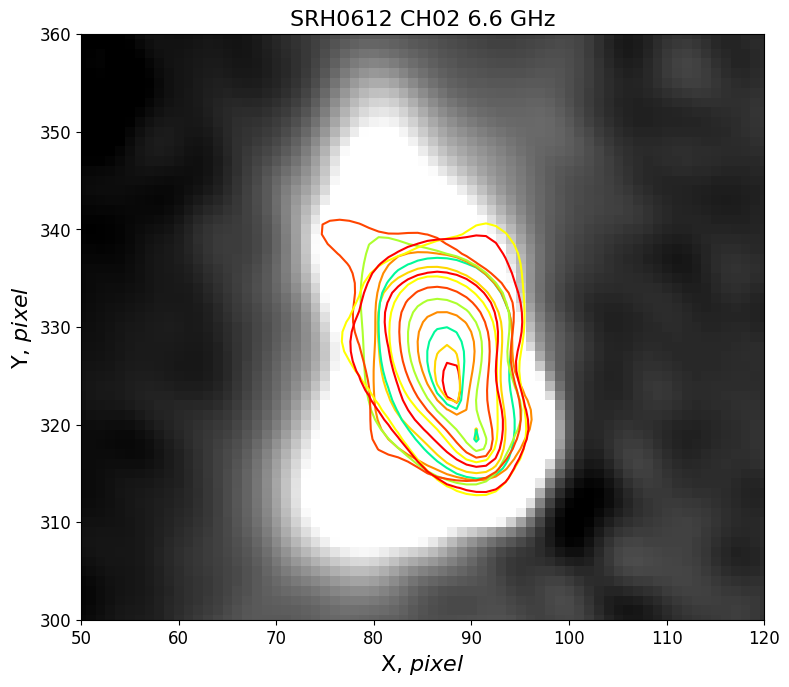

In [7]:
cols = makecolors()
size_of_words = 16

fig = plt.figure(figsize=(8, 8))
plt.imshow(backgrnd_I, origin = 'lower', cmap = 'gray', norm = mpl_cols.Normalize(vmin = 500, vmax = 9e4))#, norm = mpl_cols.Normalize(vmin = -9e5, vmax = 4e6))

for i in range(0,len(In_list)-20, 3):
    plt.contour(In_list[i], levels = [np.max(backgrnd_I)*0.4], origin='lower', colors =cols[i])
plt.xlabel('X, $pixel$', fontsize=size_of_words)
plt.ylabel('Y, $pixel$', fontsize=size_of_words)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(50, 120)
plt.ylim(300, 360)
plt.title(maps_list_I[1].observer+' ' + maps_list_I[1].channel+' ' + str(maps_list_I[1].freq)+' GHz', fontsize=size_of_words)
plt.tight_layout()
plt.show()

А теперь с корреляцией

In [8]:
start = time.time()

with fits.open(maps_list_I[0].homepath) as hdul0:
    backgrnd_I = hdul0[0].data

In_list = []
headers_list = []

for item in tqdm(maps_list_I):
    with fits.open(item.homepath) as hdul:
        map = hdul[0].data
        headers_list.append(hdul[0].header)

    best_delta1, minimum1 = find_min_deviation_with_correlation(contr_AR(backgrnd_I), contr_AR(map))
    map = shift(map, best_delta1)
    In_list.append(map)


finish = time.time()
res = finish - start
print(f'Время выполнения кода: {round(res, 2)} секунд')

  0%|          | 0/107 [00:00<?, ?it/s]

Optimization terminated successfully.
         Current function value: -449194389143552.187500
         Iterations: 78
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: -449194389143552.187500
         Iterations: 78
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: -450442066705906.562500
         Iterations: 62
         Function evaluations: 122
Optimization terminated successfully.
         Current function value: -450471300840710.062500
         Iterations: 60
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: -449191590365729.000000
         Iterations: 66
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: -448602648069172.562500
         Iterations: 62
         Function evaluations: 121
Optimization terminated successfully.
         Current function value: -4513

/mnt/data/Документы/SRH_shift_maps/SRH_ShiftModule.py:96: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  max_y, max_x = optimize.fmin(thefunc, np.array([map_base.shape[0]//2,map_base.shape[1] // 2]))


Optimization terminated successfully.
         Current function value: -439316453235206.937500
         Iterations: 89
         Function evaluations: 208
Optimization terminated successfully.
         Current function value: -437561511294578.562500
         Iterations: 90
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: -438477837891833.500000
         Iterations: 100
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: -443108517018239.750000
         Iterations: 63
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: -442460199219787.375000
         Iterations: 57
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: -438491719347216.375000
         Iterations: 58
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: -438

Посмотрим на результат наложения после сдвига:

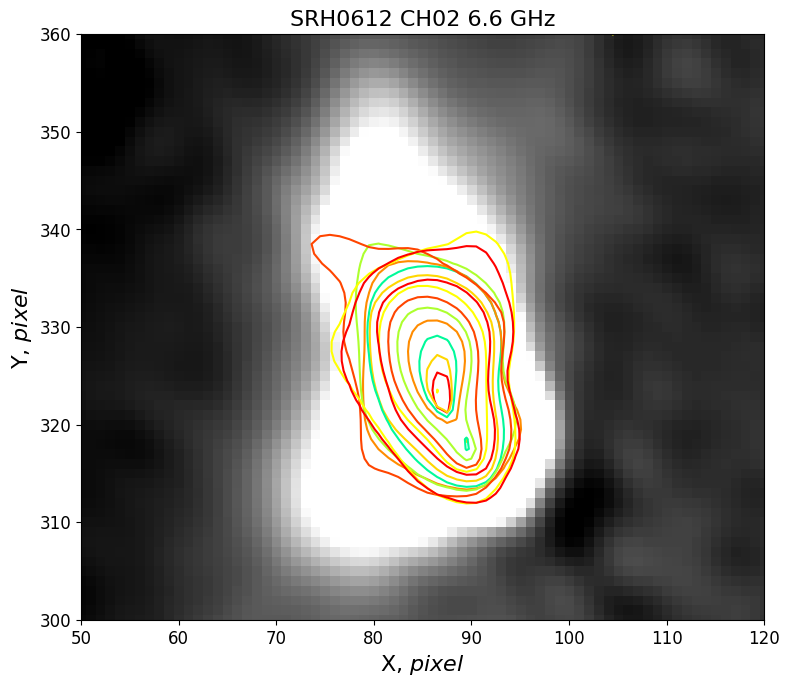

In [9]:
cols = makecolors()
size_of_words = 16

fig = plt.figure(figsize=(8, 8))
plt.imshow(backgrnd_I, origin = 'lower', cmap = 'gray', norm = mpl_cols.Normalize(vmin = 500, vmax = 9e4))#, norm = mpl_cols.Normalize(vmin = -9e5, vmax = 4e6))

for i in range(0,len(In_list)-20, 3):
    plt.contour(In_list[i], levels = [np.max(backgrnd_I)*0.4], origin='lower', colors =cols[i])
plt.xlabel('X, $pixel$', fontsize=size_of_words)
plt.ylabel('Y, $pixel$', fontsize=size_of_words)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(50, 120)
plt.ylim(300, 360)
plt.title(maps_list_I[1].observer+' ' + maps_list_I[1].channel+' ' + str(maps_list_I[1].freq)+' GHz', fontsize=size_of_words)
plt.tight_layout()
plt.show()

Сохраняем

In [10]:
# try:
#     os.mkdir(outputpath)
# except FileNotFoundError:
#     os.makedirs(os.path.dirname(outputpath), exist_ok=True)
#     os.mkdir(outputpath)
# except FileExistsError:
#     shutil.rmtree(outputpath)
#     os.mkdir(outputpath)

# for i in range(1, len(In_list)):
#     hdu_I = fits.PrimaryHDU(data=In_list[i], header=headers_list[i])
#     hdu_I.writeto(outputpath + maps_list_I[i].name)


Очистка кеш-памяти от построения картинок, если делали их много:

In [11]:
import gc

def MatplotlibClearMemory():
    allfignums = plt.get_fignums()
    for i in allfignums:
        fig = plt.figure(i)
        fig.clear()
        plt.close(fig)
        
MatplotlibClearMemory()
plt.figure().clear()
plt.close()
gc.collect()

1289